In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Paths
data_path = "alzheimer_images"  # Update this if needed (make sure this folder has subfolders for each class)

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4
EPOCHS = 10  # You can increase this later

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # ← changed
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # ← changed
    subset='validation',
    shuffle=False
)


# 3. Model: MobileNetV2 Base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. Compile
# Then change model loss:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # ← changed
              metrics=['accuracy'])


# 5. Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Found 4096 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 476s 4s/step - accuracy: 0.7194 - loss: 0.9851 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 8.8344e-04
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.3667e-04
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 1.0000 - loss: 7.6667e-04 - val_accuracy: 1.0000 - val_loss: 1.9978e-04
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - accuracy: 1.0000 - loss: 4.9408e-04 - val_accuracy: 1.0000 - val_loss: 1.0285e-04
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 433s 3s/step - accuracy: 1.0000 - loss: 3.1633e-04 - val_accuracy: 1.0000 - val_loss: 5.5890e-05
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 1.0000 - loss: 1.9436e-04 - val_accuracy: 1.0

In [14]:
model.save('mri_classification_mobilenet.h5') 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Paths
data_path = r"C:\Users\HP\OneDrive\Documents\projects\again\alzheimer_images"  # Update this if needed (make sure this folder has subfolders for each class)

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4
EPOCHS = 10  # You can increase this later

train_datagen = ImageDataGenerator(
    rescale=1./127.5 - 1,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    rescale=1./127.5 - 1,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # ← changed
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    data_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',  # ← changed
    subset='validation',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\projects\again\Alzheimer_MRI\test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 3. Model: MobileNetV2 Base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 4. Compile
# Then change model loss:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # ← changed
              metrics=['accuracy'])


# 5. Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Found 4096 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 1280 images belonging to 4 classes.


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.8021 - loss: 0.5287 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 4.6121e-04
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 1.0000 - loss: 7.6010e-04 - val_accuracy: 1.0000 - val_loss: 1.8730e-04
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 495s 4s/step - accuracy: 1.0000 - loss: 3.6118e-04 - val_accuracy: 1.0000 - val_loss: 9.7555e-05
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 550s 4s/step - accuracy: 1.0000 - loss: 2.4771e-04 - val_accuracy: 1.0000 - val_loss: 5.7045e-05
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 577s 5s/step - accuracy: 1.0000 - loss: 1.7675e-04 - val_accuracy: 1.0000 - val_loss: 3.7474e-05
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 1.0000 - loss: 1.0899e-04 - val_accuracy: 1.0000 - val_loss: 2.6653e-05
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 512s 4s/step 

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\n✅ Manual Accuracy: {accuracy:.4f}")

# Detailed report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


NameError: name 'x_test' is not defined

In [ ]:
from datasets import load_dataset
import os
from PIL import Image

# Load dataset
dataset = load_dataset("Falah/Alzheimer_MRI")

# Choose split (train/test/val)
train_data = dataset['train']

# Save images locally
os.makedirs("alzheimer_images/train", exist_ok=True)

for i, example in enumerate(train_data):
    image = example['image']  # This is a PIL image
    label = example['label']
    
    # Optional: create subfolder by label
    label_folder = f"alzheimer_images/train/{label}"
    os.makedirs(label_folder, exist_ok=True)

    image.save(f"{label_folder}/{i}.png")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from datasets import load_dataset
import os

# Load test split
dataset = load_dataset("Falah/Alzheimer_MRI", split='test')

# Save images
for idx, item in enumerate(dataset):
    image = item['image']
    label = item['label']
    
    # Get class name (e.g., 'MildDemented')
    class_name = dataset.features['label'].int2str(label)

    # Create directory if not exists
    save_path = f"Alzheimer_MRI/test/{class_name}/"
    os.makedirs(save_path, exist_ok=True)
    
    # Save image with a proper filename and extension (e.g., img_001.jpg)
    image.save(os.path.join(save_path, f"img_{idx:04d}.jpg"))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 32

# Data generators with normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\projects\again\alzheimer_images\train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\projects\again\alzheimer_images\train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\projects\again\Alzheimer_MRI\test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4098 images belonging to 4 classes.
Found 1022 images belonging to 4 classes.
Found 1280 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model for faster training (optional)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,  # You can increase this based on performance
    validation_data=val_generator
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 547s 4s/step - accuracy: 0.4659 - loss: 1.1337 - val_accuracy: 0.5450 - val_loss: 0.9149
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.5779 - loss: 0.9181 - val_accuracy: 0.6106 - val_loss: 0.8585
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.5973 - loss: 0.8840 - val_accuracy: 0.6399 - val_loss: 0.8394
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.6168 - loss: 0.8295 - val_accuracy: 0.6566 - val_loss: 0.8255
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.6472 - loss: 0.8052 - val_accuracy: 0.6389 - val_loss: 0.7942
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.6469 - loss: 0.7982 - val_accuracy: 0.6585 - val_loss: 0.7833
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.6592 - loss: 0.7837 - val_accuracy: 0.6722 - val_loss: 0.7740
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 443s 3s/step - accuracy: 0.6744 - loss: 0.7527 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.5619 - loss: 0.9808
Test Accuracy: 0.61


In [ ]:
model.save('mri_classification_mobilenet.h5') 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Predictions
y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

40/40 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step
                    precision    recall  f1-score   support

     Mild_Demented       0.40      0.58      0.47       172
 Moderate_Demented       0.00      0.00      0.00        15
      Non_Demented       0.87      0.56      0.68       634
Very_Mild_Demented       0.53      0.71      0.60       459

          accuracy                           0.61      1280
         macro avg       0.45      0.46      0.44      1280
      weighted avg       0.67      0.61      0.62      1280



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [ ]:
import tensorflow as tf
# Unfreeze last 30 layers (except BatchNorm layers)
for layer in base_model.layers[-30:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # low LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Early stop if val_loss doesn't improve after 3 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Reduce LR if val_loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

# Save the best model during training
model_ckpt = ModelCheckpoint(
    'best_finetuned_model.h5',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
history_fine = model.fit(
    train_generator,
    epochs=20,  # you can go more if needed
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr, model_ckpt]  # optional
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7492 - loss: 0.5999

129/129 ━━━━━━━━━━━━━━━━━━━━ 533s 4s/step - accuracy: 0.7493 - loss: 0.5998 - val_accuracy: 0.7094 - val_loss: 0.6542 - learning_rate: 1.0000e-05
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 535s 4s/step - accuracy: 0.7822 - loss: 0.5256 - val_accuracy: 0.6898 - val_loss: 0.6833 - learning_rate: 1.0000e-05
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8153 - loss: 0.4707

129/129 ━━━━━━━━━━━━━━━━━━━━ 544s 4s/step - accuracy: 0.8153 - loss: 0.4707 - val_accuracy: 0.7495 - val_loss: 0.5628 - learning_rate: 1.0000e-05
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8335 - loss: 0.4479

129/129 ━━━━━━━━━━━━━━━━━━━━ 524s 4s/step - accuracy: 0.8336 - loss: 0.4477 - val_accuracy: 0.7769 - val_loss: 0.5296 - learning_rate: 1.0000e-05
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8601 - loss: 0.3917

129/129 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.8601 - loss: 0.3917 - val_accuracy: 0.7838 - val_loss: 0.5094 - learning_rate: 1.0000e-05
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8893 - loss: 0.3440

129/129 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - accuracy: 0.8892 - loss: 0.3441 - val_accuracy: 0.7769 - val_loss: 0.5041 - learning_rate: 1.0000e-05
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - accuracy: 0.8979 - loss: 0.3157 - val_accuracy: 0.7642 - val_loss: 0.5240 - learning_rate: 1.0000e-05
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8912 - loss: 0.3129

129/129 ━━━━━━━━━━━━━━━━━━━━ 590s 4s/step - accuracy: 0.8913 - loss: 0.3128 - val_accuracy: 0.8063 - val_loss: 0.4725 - learning_rate: 1.0000e-05
Epoch 9/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9333 - loss: 0.2528

129/129 ━━━━━━━━━━━━━━━━━━━━ 522s 4s/step - accuracy: 0.9333 - loss: 0.2529 - val_accuracy: 0.8033 - val_loss: 0.4561 - learning_rate: 1.0000e-05
Epoch 10/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9364 - loss: 0.2499

129/129 ━━━━━━━━━━━━━━━━━━━━ 547s 4s/step - accuracy: 0.9364 - loss: 0.2499 - val_accuracy: 0.8239 - val_loss: 0.4355 - learning_rate: 1.0000e-05
Epoch 11/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 512s 4s/step - accuracy: 0.9559 - loss: 0.2094 - val_accuracy: 0.7642 - val_loss: 0.5234 - learning_rate: 1.0000e-05
Epoch 12/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9468 - loss: 0.2055

129/129 ━━━━━━━━━━━━━━━━━━━━ 548s 4s/step - accuracy: 0.9469 - loss: 0.2055 - val_accuracy: 0.8170 - val_loss: 0.4295 - learning_rate: 1.0000e-05
Epoch 13/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 523s 4s/step - accuracy: 0.9580 - loss: 0.1806 - val_accuracy: 0.7965 - val_loss: 0.4483 - learning_rate: 1.0000e-05
Epoch 14/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9731 - loss: 0.1583

129/129 ━━━━━━━━━━━━━━━━━━━━ 440s 3s/step - accuracy: 0.9731 - loss: 0.1583 - val_accuracy: 0.8425 - val_loss: 0.3928 - learning_rate: 1.0000e-05
Epoch 15/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9808 - loss: 0.1387

129/129 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.9807 - loss: 0.1387 - val_accuracy: 0.8493 - val_loss: 0.3829 - learning_rate: 1.0000e-05
Epoch 16/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9732 - loss: 0.1406

129/129 ━━━━━━━━━━━━━━━━━━━━ 849s 7s/step - accuracy: 0.9732 - loss: 0.1406 - val_accuracy: 0.8532 - val_loss: 0.3670 - learning_rate: 1.0000e-05
Epoch 17/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 536s 4s/step - accuracy: 0.9910 - loss: 0.1071 - val_accuracy: 0.8376 - val_loss: 0.4037 - learning_rate: 1.0000e-05
Epoch 18/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 500s 4s/step - accuracy: 0.9867 - loss: 0.1090 - val_accuracy: 0.8513 - val_loss: 0.3713 - learning_rate: 1.0000e-05
Epoch 19/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9978 - loss: 0.0819

129/129 ━━━━━━━━━━━━━━━━━━━━ 485s 4s/step - accuracy: 0.9978 - loss: 0.0819 - val_accuracy: 0.8562 - val_loss: 0.3525 - learning_rate: 2.0000e-06
Epoch 20/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9978 - loss: 0.0762

129/129 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.9978 - loss: 0.0762 - val_accuracy: 0.8620 - val_loss: 0.3490 - learning_rate: 2.0000e-06


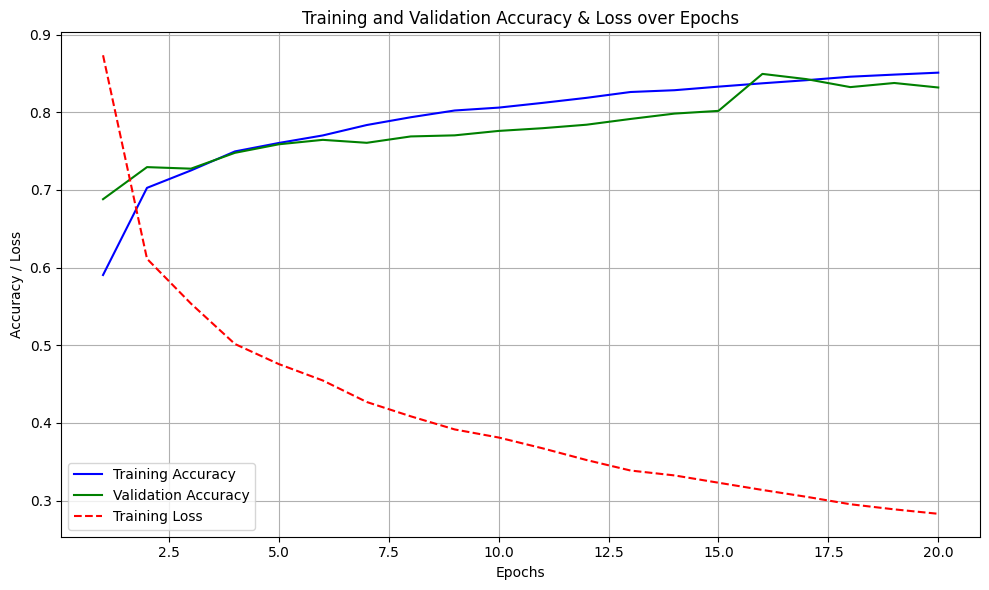

In [ ]:
import matplotlib.pyplot as plt

# Your data
train_acc = [0.5904, 0.7026, 0.7250, 0.7495, 0.7604, 0.7701, 0.7835, 0.7935, 0.8022, 0.8059, 0.8120, 0.8185, 0.8260, 0.8283, 0.8329, 0.8372, 0.8412, 0.8457, 0.8484, 0.8509]
train_loss = [0.8733, 0.6113, 0.5536, 0.5016, 0.4757, 0.4546, 0.4269, 0.4085, 0.3916, 0.3812, 0.3673, 0.3522, 0.3387, 0.3324, 0.3230, 0.3137, 0.3049, 0.2953, 0.2887, 0.2830]
val_acc = [0.6880, 0.7293, 0.7273, 0.7477, 0.7587, 0.7644, 0.7606, 0.7688, 0.7702, 0.7759, 0.7794, 0.7839, 0.7913, 0.7982, 0.8017, 0.8493, 0.8426, 0.8323, 0.8376, 0.8318]

# Epochs
epochs = range(1, len(train_acc) + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.plot(epochs, train_loss, 'r--', label='Training Loss')

plt.title('Training and Validation Accuracy & Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.6094
Test Loss: 0.8763


In [ ]:
model.save('my_model.keras')  # Instead of .h5

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('best_finetuned_model.h5')

# Load and preprocess the image
img_path = r'C:\Users\HP\OneDrive\Documents\projects\again\Alzheimer_MRI\test\Mild_Demented\img_0004.jpg'
img = image.load_img(img_path, color_mode='grayscale', target_size=(224, 224))

# Convert to array
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict
predictions = model.predict(img_array)

# Get predicted class
class_labels = ['non_demented', 'mild_demented', 'moderate_demented', 'very_mild_demented']
predicted_class = class_labels[np.argmax(predictions)]

# Show result
print("Predicted class:", predicted_class)

# Show image
plt.imshow(img_array.squeeze(), cmap='gray')  # ✅ squeeze NumPy array, not PIL image
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "Conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 224, 224, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 1), dtype=float32)
  • training=False
  • mask=None